In [1]:
import numpy as np
import pickle
import matplotlib.pyplot as plt

In [2]:
EP_INFO_PATH = "eval_logs/learn_dispense_v5_1/rollout_data/test_batch_1_info"
ROLLOUT_DATA = "eval_logs/learn_dispense_v5_1/rollout_data/test_batch_1"

In [3]:
MAX_ROT_ACC = np.pi / 4
MIN_ROT_ACC = -2 * MAX_ROT_ACC
MAX_ROT_VEL = np.pi / 32
MIN_ROT_VEL = -2 * MAX_ROT_VEL

OBS_DATA = ["error", "error_rate", "velocity", "acceleration", "pid_output", "angle_fb"]
OBS_HIST_LENGTH = [5, 5, 1, 1, 1, 1]
OBS_MEAN = [50, -25, 0, 0, 0, (np.pi / 6)]
OBS_STD = [50, 25, MAX_ROT_VEL, MAX_ROT_ACC, MAX_ROT_VEL, (np.pi / 6)]

In [4]:
def load_and_process_episode_data(path):
    f = open(path, 'rb')
    data = pickle.load(f)
    data, success = data['episode'], data['is_success']
    data = dict([(k, [ep[k] for ep in data]) for k in data[0].keys()])
    data['is_success'] = success
    return data


def load_and_process_rollout_data(path):
    f = open(path, 'rb')
    data = pickle.load(f)

    obs_data = data.pop('obs')

    obs_idx = [0,]
    for i in OBS_HIST_LENGTH[:-1]:
        obs_idx.append(obs_idx[-1] + i)

    obs_data = obs_data[:, obs_idx]
    obs_data = obs_data * np.array(OBS_STD) + np.array(OBS_MEAN)

    for o, v in zip(OBS_DATA, obs_data.T):
        data[o] = v

    episode_slice_idx = []
    for idx in range(len(data['episode_start'])):
        if data['episode_start'][idx] == 1:
            episode_slice_idx.append(idx)
    episode_slice_idx.append(len(data['episode_start']))
    data['episode_slice_idx'] = episode_slice_idx

    return data

In [5]:
ep_data = load_and_process_episode_data(EP_INFO_PATH)
rollout_data = load_and_process_rollout_data(ROLLOUT_DATA)

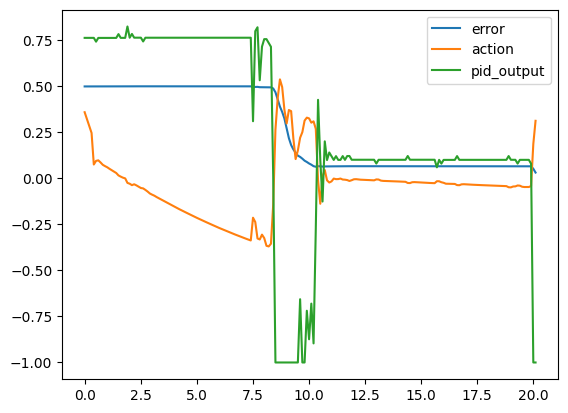

mean_reward: -0.0128
length: 200.0000
return: -2.5582
dispense_time: 23.5111
requested_wt: 30.0000
dispensed_wt: 31.3500
e_penalty: 0.0100
e_dt_penalty: 0.0027
e_d2t_penalty: 0.0001
mean_action: -0.0397
action_max_clip: 0.0050
action_min_clip: 0.0000
is_success: 1.0000


In [6]:
EPISODE_NO = 3
ITEM = ['error', 'action', 'pid_output']
SCALE = [1/60, 1, 1/MAX_ROT_VEL]

start_idx = rollout_data['episode_slice_idx'][EPISODE_NO]
end_idx = rollout_data['episode_slice_idx'][EPISODE_NO+1]

for i, s in zip(ITEM, SCALE):
    plt.plot(rollout_data['time'][start_idx:end_idx], s * rollout_data[i][start_idx:end_idx], label=i)
plt.legend()
plt.show()
for k, v in ep_data.items():
    print(f"{k}: {v[EPISODE_NO]:0.4f}")